<a href="https://colab.research.google.com/github/fmonteci/Telecom_x/blob/main/Telecom_X_FM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
#Telecom X
***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Carga de Datos

In [3]:
datos=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Archivos/Telecom X/df_normalizado.csv')
datos.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
1582,2252-isrnh,0.0,0,0,1,1,9,1,yes,fiber optic,...,yes,no,yes,no,one year,1,electronic check,90.35,767.90,3.011667
4850,6635-cpnun,0.0,0,0,1,0,28,1,yes,fiber optic,...,yes,no,yes,no,month-to-month,0,credit card (automatic),96.60,2684.35,3.220000
2067,2908-ztpnf,0.0,1,0,0,0,36,0,no phone service,dsl,...,no,yes,no,no,month-to-month,1,bank transfer (automatic),34.85,1267.20,1.161667
4620,6338-avwcy,1.0,0,0,0,0,3,0,no phone service,dsl,...,yes,no,yes,no,month-to-month,1,mailed check,40.15,130.75,1.338333
1060,1482-oxzsy,0.0,0,0,0,0,30,1,yes,fiber optic,...,no,no,yes,yes,month-to-month,1,bank transfer (automatic),100.40,2936.25,3.346667
5477,7508-dqakk,0.0,1,0,0,0,64,1,yes,dsl,...,yes,yes,yes,yes,two year,1,credit card (automatic),86.40,5442.05,2.880000
4737,6486-lhtma,0.0,1,1,1,0,31,1,yes,fiber optic,...,yes,no,yes,no,one year,1,electronic check,90.70,2835.50,3.023333
4005,5480-hprrx,1.0,1,1,0,0,3,0,no phone service,dsl,...,no,no,no,no,month-to-month,0,electronic check,25.30,77.75,0.843333
6666,9167-apmxz,0.0,1,0,0,0,22,1,yes,fiber optic,...,no,no,yes,no,month-to-month,1,bank transfer (automatic),84.15,1821.95,2.805000
6082,8313-ktihg,0.0,0,0,0,0,4,1,no,dsl,...,no,yes,yes,no,month-to-month,1,electronic check,61.30,249.40,2.043333


In [4]:
df=datos.copy()
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-orfbo,0.0,1,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0.0,0,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1.0,0,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1.0,0,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1.0,1,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


In [5]:
cols_a_eliminar = ["customerID"]

In [6]:
df_clean = df.drop(columns=cols_a_eliminar, errors="ignore")

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
df_work = df_clean.copy()

In [9]:
if df_work['Churn'].isna().any():
    df_work = df_work.dropna(subset=['Churn']).copy()

In [10]:
df_work['Churn'] = df_work['Churn'].astype(int)

In [11]:
for col in ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']:
    if col in df_work.columns:
        df_work[col] = pd.to_numeric(df_work[col], errors='coerce')

In [12]:
cat_cols = df_work.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df_work.select_dtypes(include=[np.number]).columns.drop('Churn').tolist()

In [13]:
for col in num_cols:
    if df_work[col].isna().any():
        df_work[col] = df_work[col].fillna(df_work[col].median())
for col in cat_cols:
    if df_work[col].isna().any():
        df_work[col] = df_work[col].fillna('Unknown')

In [14]:
X = df_work.drop(columns=['Churn'])
y = df_work['Churn']
X_oh = pd.get_dummies(X, columns=cat_cols, drop_first=True, dtype=int)

In [15]:
print("Categóricas codificadas:", cat_cols)
print("Forma tras One-Hot:", X_oh.shape)

Categóricas codificadas: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Forma tras One-Hot: (7043, 31)


In [16]:
cols_internet = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']
cols_phone = ['MultipleLines'] if 'MultipleLines' in df_work.columns else []

In [17]:
for col in cols_internet:
    if col in df_work.columns:
        df_work[col] = df_work[col].replace({'No internet service': 'no'})

for col in cols_phone:
    if col in df_work.columns:
        df_work[col] = df_work[col].replace({'No phone service': 'no'})

In [18]:
for col in cols_internet:
    if col in df_work.columns:
        df_work[col] = df_work[col].replace({'no internet service': 'no'})

for col in cols_phone:
    if col in df_work.columns:
        df_work[col] = df_work[col].replace({'no phone service': 'no'})

In [19]:
for col in cols_internet + cols_phone:
    if col in df_work.columns:
        print(col, df_work[col].unique())

OnlineSecurity ['no' 'yes']
OnlineBackup ['yes' 'no']
DeviceProtection ['no' 'yes']
TechSupport ['yes' 'no']
StreamingTV ['yes' 'no']
StreamingMovies ['no' 'yes']
MultipleLines ['no' 'yes']


In [20]:
X = df_work.drop(columns=['Churn'])
y = df_work['Churn']
X_oh = pd.get_dummies(X, columns=cat_cols, drop_first=True, dtype=int)

In [21]:
print("Categóricas codificadas:", cat_cols)
print("Forma tras One-Hot:", X_oh.shape)

Categóricas codificadas: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Forma tras One-Hot: (7043, 24)


In [22]:
class_counts = y.value_counts()
class_ratio = y.value_counts(normalize=True).round(4)
print("Conteos:", class_counts.to_dict())
print("Proporciones:", class_ratio.to_dict())

Conteos: {0: 5174, 1: 1869}
Proporciones: {0: 0.7346, 1: 0.2654}


In [23]:
from sklearn.utils import resample

# Split estratificado (mantiene proporciones en train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X_oh, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
minority_pct = y_train.mean() if y_train.mean() < 0.5 else 1 - y_train.mean()
apply_oversample = minority_pct < 0.35
print("¿Aplicar oversampling?:", apply_oversample)

¿Aplicar oversampling?: True


In [25]:
if apply_oversample:
    # Unimos X e y temporariamente
    train_df = X_train.copy()
    train_df['Churn'] = y_train.values

In [26]:
majority_class = train_df['Churn'].value_counts().idxmax()
df_majority = train_df[train_df['Churn'] == majority_class]
df_minority = train_df[train_df['Churn'] != majority_class]

In [29]:
    df_minority_over = resample(
        df_minority,
        replace=True,
        n_samples=len(df_majority),
        random_state=42
    )

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_oh, y, test_size=0.2, random_state=42, stratify=y
)


# minoritaria = min(%, 1-%). Si es < 35%, aplicamos oversampling
minority_pct = y_train.mean() if y_train.mean() < 0.5 else 1 - y_train.mean()
apply_oversample = minority_pct < 0.35
print("¿Aplicar oversampling?:", apply_oversample)

# Guardamos proporciones/tamaños ANTES del balanceo (para registro)
train_counts_before = y_train.value_counts().to_dict()
print("Clases en TRAIN (antes):", train_counts_before)

if apply_oversample:
    # Unimos X e y (temporal) para re-muestrear filas completas
    train_df = X_train.copy()
    train_df['Churn'] = y_train.values

    # Identificamos mayoría y minoría
    majority_class = train_df['Churn'].value_counts().idxmax()
    df_majority = train_df[train_df['Churn'] == majority_class]
    df_minority = train_df[train_df['Churn'] != majority_class]

    # Oversampling: replicamos la minoritaria hasta igualar la mayoritaria
    df_minority_over = resample(
        df_minority,
        replace=True,                 # con reemplazo
        n_samples=len(df_majority),   # mismo tamaño que la mayoría
        random_state=42
    )

    # Conjunto equilibrado para ENTRENAR (y barajamos)
    train_balanced = pd.concat([df_majority, df_minority_over], axis=0)\
                       .sample(frac=1, random_state=42)

    # Separamos nuevamente features y target
    y_train_bal = train_balanced['Churn'].astype(int)
    X_train_bal = train_balanced.drop(columns=['Churn'])
else:
    # Si no hace falta balancear, seguimos con el train original
    X_train_bal, y_train_bal = X_train, y_train

# Proporciones/tamaños DESPUÉS del balanceo
train_counts_after = y_train_bal.value_counts().to_dict()
print("Clases en TRAIN (después):", train_counts_after)

# Resumen de tamaños
print("Tamaño TRAIN original:", X_train.shape, "→ balanceado:", X_train_bal.shape)
print("Tamaño TEST:", X_test.shape)

¿Aplicar oversampling?: True
Clases en TRAIN (antes): {0: 4139, 1: 1495}
Clases en TRAIN (después): {0: 4139, 1: 4139}
Tamaño TRAIN original: (5634, 24) → balanceado: (8278, 24)
Tamaño TEST: (1409, 24)


In [31]:
from sklearn.preprocessing import StandardScaler

# Solo escalamos CONTINUAS (evita "romper" dummies 0/1)
continuous_cols = [c for c in ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
                   if c in X_train_bal.columns]

scaler = StandardScaler()

# Copias para no tocar los originales
X_train_scaled = X_train_bal.copy()
X_test_scaled  = X_test.copy()

if continuous_cols:
    # Ajustamos con TRAIN y aplicamos a TRAIN y TEST (sin data leakage)
    X_train_scaled[continuous_cols] = scaler.fit_transform(X_train_bal[continuous_cols])
    X_test_scaled[continuous_cols]  = scaler.transform(X_test[continuous_cols])

print("Columnas escaladas:", continuous_cols)

Columnas escaladas: ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']


In [32]:
import matplotlib.pyplot as plt

In [33]:
num_df = df_work.select_dtypes(include=[np.number]).copy()

In [34]:
corr_matrix = num_df.corr(method='pearson')

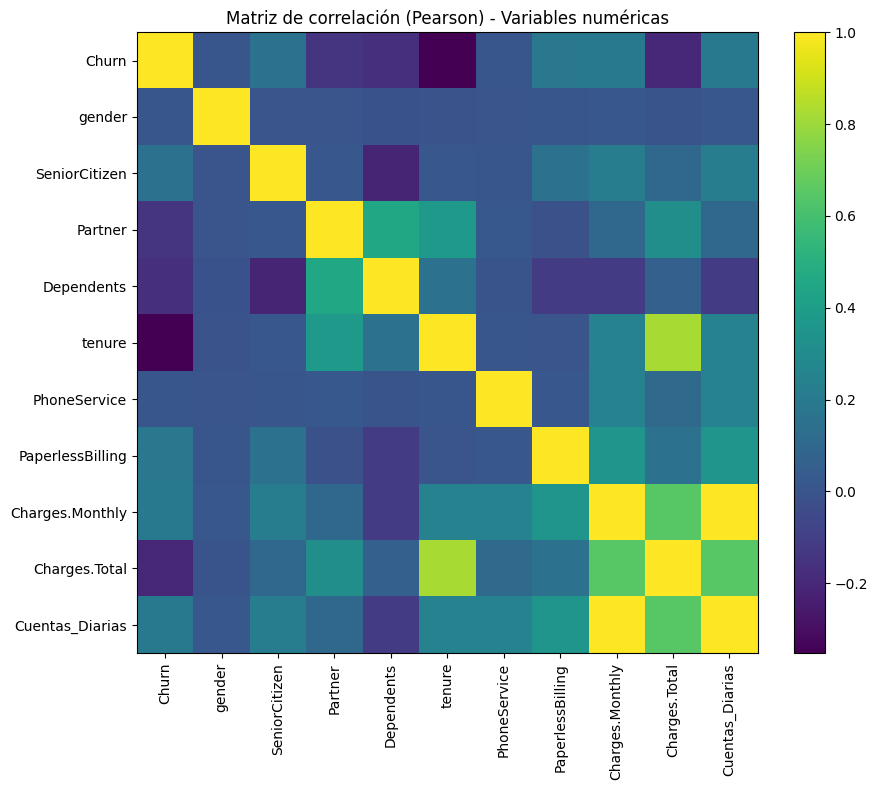

In [35]:
plt.figure(figsize=(10, 8))
im = plt.imshow(corr_matrix.values)
plt.title("Matriz de correlación (Pearson) - Variables numéricas")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(ticks=range(len(num_df.columns)), labels=num_df.columns, rotation=90)
plt.yticks(ticks=range(len(num_df.columns)), labels=num_df.columns)
plt.tight_layout()
plt.show()

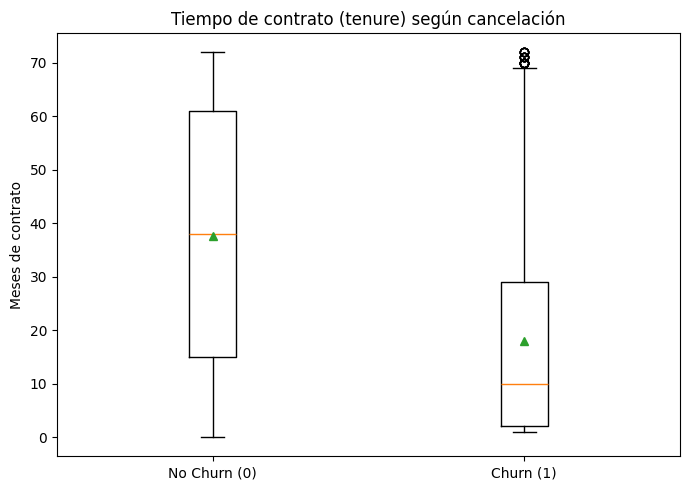

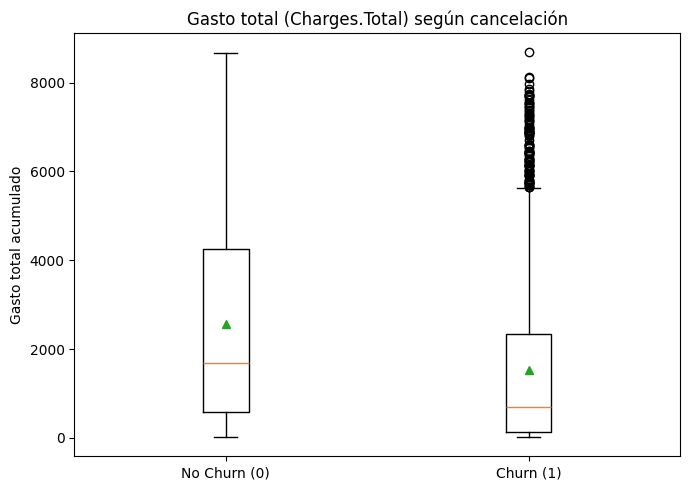

In [36]:
# Boxplot de 'tenure' por Churn
tenure_no = df_work.loc[df_work['Churn'] == 0, 'tenure']
tenure_yes = df_work.loc[df_work['Churn'] == 1, 'tenure']

plt.figure(figsize=(7, 5))
plt.boxplot([tenure_no, tenure_yes], labels=['No Churn (0)', 'Churn (1)'], showmeans=True)
plt.title("Tiempo de contrato (tenure) según cancelación")
plt.ylabel("Meses de contrato")
plt.tight_layout()
plt.show()

# Boxplot de 'Charges.Total' por Churn
charges_no = df_work.loc[df_work['Churn'] == 0, 'Charges.Total']
charges_yes = df_work.loc[df_work['Churn'] == 1, 'Charges.Total']

plt.figure(figsize=(7, 5))
plt.boxplot([charges_no, charges_yes], labels=['No Churn (0)', 'Churn (1)'], showmeans=True)
plt.title("Gasto total (Charges.Total) según cancelación")
plt.ylabel("Gasto total acumulado")
plt.tight_layout()
plt.show()

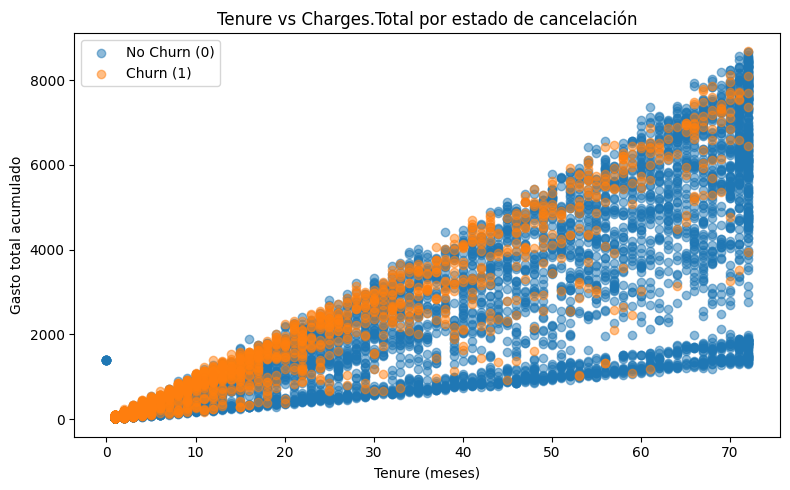

In [37]:
mask_no = df_work['Churn'] == 0
mask_yes = df_work['Churn'] == 1

plt.figure(figsize=(8, 5))
plt.scatter(df_work.loc[mask_no, 'tenure'], df_work.loc[mask_no, 'Charges.Total'], alpha=0.5, label='No Churn (0)')
plt.scatter(df_work.loc[mask_yes, 'tenure'], df_work.loc[mask_yes, 'Charges.Total'], alpha=0.5, label='Churn (1)')
plt.title("Tenure vs Charges.Total por estado de cancelación")
plt.xlabel("Tenure (meses)")
plt.ylabel("Gasto total acumulado")
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [41]:
log_reg = LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)
log_reg.fit(X_train_scaled, y_train_bal)  # entrenamos con TRAIN balanceado y escalado

# Predicciones en TEST (también escalado)
y_pred_lr = log_reg.predict(X_test_scaled)

# Métricas
metrics_lr = {
    "Modelo": "Logistic Regression (scaled)",
    "Accuracy":  accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr, zero_division=0),
    "Recall":    recall_score(y_test, y_pred_lr, zero_division=0),
    "F1":        f1_score(y_test, y_pred_lr, zero_division=0),
    "CM":        confusion_matrix(y_test, y_pred_lr)
}

In [42]:
#RF
rf = RandomForestClassifier(
    n_estimators=400,        # más árboles mejora estabilidad
    random_state=42,
    n_jobs=-1,
    max_depth=None,          # sin limitar profundidad (luego podemos regular para evitar overfitting)
    min_samples_split=2,
    min_samples_leaf=1
)
rf.fit(X_train_bal, y_train_bal)  # entrenamos con TRAIN balanceado (sin escalar)

# Predicciones en TEST (sin escalar)
y_pred_rf = rf.predict(X_test)

# Métricas
metrics_rf = {
    "Modelo": "Random Forest",
    "Accuracy":  accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf, zero_division=0),
    "Recall":    recall_score(y_test, y_pred_rf, zero_division=0),
    "F1":        f1_score(y_test, y_pred_rf, zero_division=0),
    "CM":        confusion_matrix(y_test, y_pred_rf)
}

In [43]:
df_eval = pd.DataFrame([
    {k: v for k, v in metrics_lr.items() if k != "CM"},
    {k: v for k, v in metrics_rf.items() if k != "CM"}
]).set_index("Modelo").round(4)

print("=== Métricas en TEST ===")
print(df_eval, "\n")

print("=== Matriz de confusión - Logistic Regression (scaled) ===")
print(pd.DataFrame(metrics_lr["CM"], index=["Real_0","Real_1"], columns=["Pred_0","Pred_1"]), "\n")

print("=== Matriz de confusión - Random Forest ===")
print(pd.DataFrame(metrics_rf["CM"], index=["Real_0","Real_1"], columns=["Pred_0","Pred_1"]))

=== Métricas en TEST ===
                              Accuracy  Precision  Recall      F1
Modelo                                                           
Logistic Regression (scaled)    0.7388     0.5050  0.8102  0.6222
Random Forest                   0.7814     0.5948  0.5535  0.5734 

=== Matriz de confusión - Logistic Regression (scaled) ===
        Pred_0  Pred_1
Real_0     738     297
Real_1      71     303 

=== Matriz de confusión - Random Forest ===
        Pred_0  Pred_1
Real_0     894     141
Real_1     167     207


In [44]:
if 'log_reg' not in globals():
    raise RuntimeError("No encuentro 'log_reg'. Ejecuta la celda de entrenamiento de modelos previa.")

coefs = log_reg.coef_.ravel()
feat_lr = pd.DataFrame({
    "feature": X_train_scaled.columns,
    "coef": coefs,
})
feat_lr["odds_ratio"] = np.exp(feat_lr["coef"])          # OR para interpretar magnitud
feat_lr["abs_coef"] = feat_lr["coef"].abs()

# Top 12 por impacto absoluto
feat_lr_top = feat_lr.sort_values("abs_coef", ascending=False).head(12)
feat_lr_pos = feat_lr.sort_values("coef", ascending=False).head(10)   # aumenta churn
feat_lr_neg = feat_lr.sort_values("coef", ascending=True).head(10)    # reduce churn

print("\n=== Logistic Regression — TOP por |coef| ===")
print(feat_lr_top[["feature","coef","odds_ratio"]].round(4).to_string(index=False))

print("\n--- Mayores impulsores de Churn (coef > 0) ---")
print(feat_lr_pos[["feature","coef","odds_ratio"]].round(4).to_string(index=False))

print("\n--- Mayores protectores (coef < 0) ---")
print(feat_lr_neg[["feature","coef","odds_ratio"]].round(4).to_string(index=False))


=== Logistic Regression — TOP por |coef| ===
                       feature    coef  odds_ratio
             Contract_two year -1.4685      0.2303
                        tenure -1.2954      0.2738
            InternetService_no -0.9850      0.3735
   InternetService_fiber optic  0.7843      2.1909
                 Charges.Total  0.6869      1.9876
             Contract_one year -0.6183      0.5389
PaymentMethod_electronic check  0.4166      1.5167
                  PhoneService -0.3851      0.6804
               TechSupport_yes -0.3783      0.6850
              PaperlessBilling  0.3696      1.4471
             MultipleLines_yes  0.3078      1.3604
            OnlineSecurity_yes -0.2822      0.7541

--- Mayores impulsores de Churn (coef > 0) ---
                       feature    coef  odds_ratio
   InternetService_fiber optic  0.7843      2.1909
                 Charges.Total  0.6869      1.9876
PaymentMethod_electronic check  0.4166      1.5167
              PaperlessBilling  0.3696 

In [45]:
if 'rf' not in globals():
    raise RuntimeError("No encuentro 'rf'. Ejecuta la celda de entrenamiento de modelos previa.")

feat_rf = pd.DataFrame({
    "feature": X_train_bal.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("\n=== Random Forest — TOP 15 importancias ===")
print(feat_rf.head(15).round(4).to_string(index=False))


=== Random Forest — TOP 15 importancias ===
                       feature  importance
                 Charges.Total      0.1583
                        tenure      0.1515
               Charges.Monthly      0.1283
               Cuentas_Diarias      0.1249
             Contract_two year      0.0620
   InternetService_fiber optic      0.0404
PaymentMethod_electronic check      0.0394
             Contract_one year      0.0271
              PaperlessBilling      0.0245
                        gender      0.0232
               TechSupport_yes      0.0211
            OnlineSecurity_yes      0.0206
            InternetService_no      0.0202
                       Partner      0.0199
                    Dependents      0.0183


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import f1_score


knn = KNeighborsClassifier(n_neighbors=15, weights="distance", n_jobs=-1)
knn.fit(X_train_scaled, y_train_bal)


perm_knn = permutation_importance(
    knn, X_test_scaled, y_test,
    scoring="f1", n_repeats=10, random_state=42, n_jobs=-1
)
feat_knn = pd.DataFrame({
    "feature": X_test_scaled.columns,
    "imp_mean": perm_knn.importances_mean,
    "imp_std": perm_knn.importances_std
}).sort_values("imp_mean", ascending=False)

print("\n=== KNN — TOP 15 importancias por permutación (ΔF1) ===")
print(feat_knn.head(15).round(4).to_string(index=False))


=== KNN — TOP 15 importancias por permutación (ΔF1) ===
                              feature  imp_mean  imp_std
                               tenure    0.0205   0.0076
                        Charges.Total    0.0051   0.0102
                        SeniorCitizen    0.0025   0.0066
                    Contract_one year    0.0022   0.0046
                              Partner    0.0022   0.0067
                 DeviceProtection_yes    0.0014   0.0057
                   OnlineSecurity_yes    0.0009   0.0089
                     PaperlessBilling    0.0008   0.0092
                      Cuentas_Diarias    0.0006   0.0057
                      Charges.Monthly    0.0006   0.0057
                      TechSupport_yes    0.0004   0.0072
                    MultipleLines_yes    0.0004   0.0057
           PaymentMethod_mailed check    0.0003   0.0047
PaymentMethod_credit card (automatic)    0.0001   0.0059
                               gender   -0.0006   0.0065


In [47]:
from sklearn.svm import LinearSVC

svm_lin = LinearSVC(C=1.0, dual=False, max_iter=5000, random_state=42)
svm_lin.fit(X_train_scaled, y_train_bal)

coef_svm = svm_lin.coef_.ravel()
feat_svm = pd.DataFrame({
    "feature": X_train_scaled.columns,
    "coef": coef_svm
})
feat_svm["abs_coef"] = feat_svm["coef"].abs()

feat_svm_top = feat_svm.sort_values("abs_coef", ascending=False).head(12)
feat_svm_pos = feat_svm.sort_values("coef", ascending=False).head(10)  # impulsa clase 1
feat_svm_neg = feat_svm.sort_values("coef", ascending=True).head(10)   # protege contra clase 1

print("\n=== Linear SVM — TOP por |coef| ===")
print(feat_svm_top[["feature","coef"]].round(4).to_string(index=False))

print("\n--- SVM: impulsores de Churn (coef > 0) ---")
print(feat_svm_pos[["feature","coef"]].round(4).to_string(index=False))

print("\n--- SVM: protectores (coef < 0) ---")
print(feat_svm_neg[["feature","coef"]].round(4).to_string(index=False))


=== Linear SVM — TOP por |coef| ===
                       feature    coef
            InternetService_no -0.6025
   InternetService_fiber optic  0.5011
             Contract_two year -0.4790
                        tenure -0.3979
             Contract_one year -0.2778
               StreamingTV_yes  0.1774
PaymentMethod_electronic check  0.1615
                 Charges.Total  0.1583
             MultipleLines_yes  0.1538
               Charges.Monthly -0.1451
               Cuentas_Diarias -0.1451
              PaperlessBilling  0.1368

--- SVM: impulsores de Churn (coef > 0) ---
                       feature   coef
   InternetService_fiber optic 0.5011
               StreamingTV_yes 0.1774
PaymentMethod_electronic check 0.1615
                 Charges.Total 0.1583
             MultipleLines_yes 0.1538
              PaperlessBilling 0.1368
           StreamingMovies_yes 0.1308
                 SeniorCitizen 0.0698
                        gender 0.0329
          DeviceProtection_yes 

In [48]:
top10_lr = feat_lr_top[["feature","coef"]].head(10).rename(columns={"coef":"LR_coef"}).set_index("feature")
top10_rf = feat_rf.head(10).rename(columns={"importance":"RF_import"}).set_index("feature")
top10_svm = feat_svm_top[["feature","coef"]].head(10).rename(columns={"coef":"SVM_coef"}).set_index("feature")
top10_knn = feat_knn.head(10).rename(columns={"imp_mean":"KNN_perm_imp"}).set_index("feature")

comparativo = top10_lr.join(top10_rf, how="outer").join(top10_svm, how="outer").join(top10_knn, how="outer")
print("\n=== Comparativo de TOP señales (LR / RF / SVM / KNN) ===")
print(comparativo.round(4).to_string())


=== Comparativo de TOP señales (LR / RF / SVM / KNN) ===
                                LR_coef  RF_import  SVM_coef  KNN_perm_imp  imp_std
feature                                                                            
Charges.Monthly                     NaN     0.1283   -0.1451        0.0006   0.0057
Charges.Total                    0.6869     0.1583    0.1583        0.0051   0.0102
Contract_one year               -0.6183     0.0271   -0.2778        0.0022   0.0046
Contract_two year               -1.4685     0.0620   -0.4790           NaN      NaN
Cuentas_Diarias                     NaN     0.1249       NaN        0.0006   0.0057
DeviceProtection_yes                NaN        NaN       NaN        0.0014   0.0057
InternetService_fiber optic      0.7843     0.0404    0.5011           NaN      NaN
InternetService_no              -0.9850        NaN   -0.6025           NaN      NaN
MultipleLines_yes                   NaN        NaN    0.1538           NaN      NaN
OnlineSecurity_yes

In [49]:
coef_lr = np.abs(log_reg.coef_.ravel())
feat_lr = pd.DataFrame({
    "feature": X_train_scaled.columns,
    "LR_abscoef": coef_lr
})


feat_rf = pd.DataFrame({
    "feature": X_train_bal.columns,
    "RF_import": rf.feature_importances_
})


feat_all = feat_lr.merge(feat_rf, on="feature", how="inner")
for col in ["LR_abscoef", "RF_import"]:
    mx, mn = feat_all[col].max(), feat_all[col].min()
    feat_all[col + "_norm"] = (feat_all[col] - mn) / (mx - mn) if mx > mn else 0.0


feat_all["score"] = feat_all[["LR_abscoef_norm","RF_import_norm"]].mean(axis=1)
TOP_N = 12
selected_feats = feat_all.sort_values("score", ascending=False)["feature"].head(TOP_N).tolist()

print("TOP features seleccionadas ({}):".format(TOP_N))
print(selected_feats)

TOP features seleccionadas (12):
['tenure', 'Charges.Total', 'Contract_two year', 'Charges.Monthly', 'Cuentas_Diarias', 'InternetService_no', 'InternetService_fiber optic', 'Contract_one year', 'PaymentMethod_electronic check', 'PaperlessBilling', 'TechSupport_yes', 'OnlineSecurity_yes']


In [50]:
Xtr_lr = X_train_scaled[selected_feats]
Xte_lr = X_test_scaled[selected_feats]

Xtr_rf = X_train_bal[selected_feats]
Xte_rf = X_test[selected_feats]

log_reg_sel = LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)
log_reg_sel.fit(Xtr_lr, y_train_bal)

rf_sel = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf_sel.fit(Xtr_rf, y_train_bal)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [51]:
def eval_row(y_true, y_pred, y_proba):
    return {
        "Accuracy":  accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall":    recall_score(y_true, y_pred, zero_division=0),
        "F1":        f1_score(y_true, y_pred, zero_division=0),
        "ROC_AUC":   roc_auc_score(y_true, y_proba)
    }

In [52]:
from sklearn.metrics import (
       roc_auc_score, roc_curve
)

In [53]:
y_pred_lr = log_reg_sel.predict(Xte_lr)
y_proba_lr = log_reg_sel.predict_proba(Xte_lr)[:, 1]

y_pred_rf = rf_sel.predict(Xte_rf)
y_proba_rf = rf_sel.predict_proba(Xte_rf)[:, 1]

df_eval = pd.DataFrame(
    [eval_row(y_test, y_pred_lr, y_proba_lr),
     eval_row(y_test, y_pred_rf, y_proba_rf)],
    index=["LogReg (TOP)", "RandomForest (TOP)"]
).round(4)

print("\n=== Métricas en TEST (con TOP features) ===")
print(df_eval)


=== Métricas en TEST (con TOP features) ===
                    Accuracy  Precision  Recall      F1  ROC_AUC
LogReg (TOP)          0.7395     0.5059  0.8021  0.6205   0.8396
RandomForest (TOP)    0.7729     0.5758  0.5481  0.5616   0.8138


In [54]:
import matplotlib.pyplot as plt

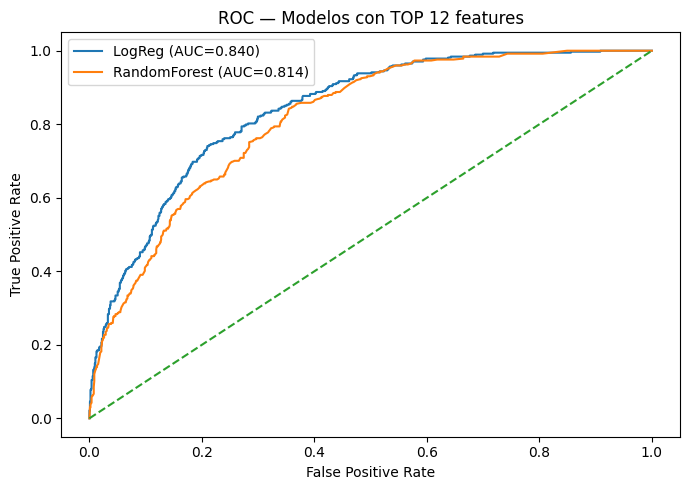

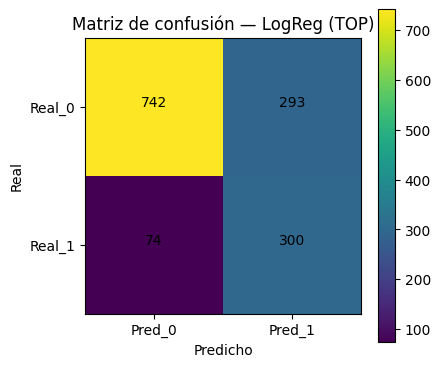

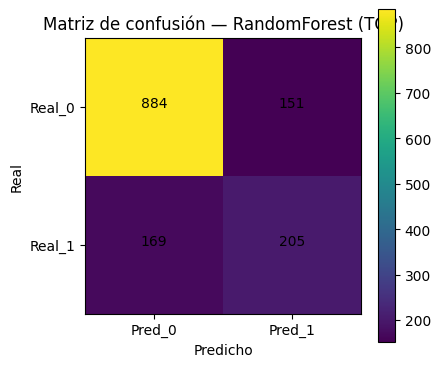

In [55]:
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label="LogReg (AUC={:.3f})".format(df_eval.loc["LogReg (TOP)","ROC_AUC"]))
plt.plot(fpr_rf, tpr_rf, label="RandomForest (AUC={:.3f})".format(df_eval.loc["RandomForest (TOP)","ROC_AUC"]))
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC — Modelos con TOP {} features".format(TOP_N))
plt.legend()
plt.tight_layout()
plt.show()


def plot_cm(cm, title):
    plt.figure(figsize=(4.5,4))
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["Pred_0","Pred_1"])
    plt.yticks(tick_marks, ["Real_0","Real_1"])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center")
    plt.ylabel('Real')
    plt.xlabel('Predicho')
    plt.tight_layout()
    plt.show()


cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plot_cm(cm_lr, "Matriz de confusión — LogReg (TOP)")
plot_cm(cm_rf, "Matriz de confusión — RandomForest (TOP)")

In [56]:
coef_sel = pd.Series(log_reg_sel.coef_.ravel(), index=Xtr_lr.columns).sort_values(key=np.abs, ascending=False)
report_lr = pd.DataFrame({"coef": coef_sel, "odds_ratio": np.exp(coef_sel)}).round(4).head(12)

imp_sel = pd.Series(rf_sel.feature_importances_, index=Xtr_rf.columns).sort_values(ascending=False)
report_rf = pd.DataFrame({"importance": imp_sel}).round(4).head(12)

print("\n=== Top señales — Logistic Regression (signo y OR) ===")
print(report_lr.to_string())

print("\n=== Top señales — Random Forest (importancia) ===")
print(report_rf.to_string())


=== Top señales — Logistic Regression (signo y OR) ===
                                  coef  odds_ratio
Contract_two year              -1.5354      0.2154
tenure                         -1.2724      0.2801
InternetService_no             -0.9722      0.3782
Charges.Total                   0.7121      2.0383
Contract_one year              -0.6771      0.5081
InternetService_fiber optic     0.5461      1.7264
PaymentMethod_electronic check  0.5160      1.6753
TechSupport_yes                -0.4254      0.6535
PaperlessBilling                0.4097      1.5064
OnlineSecurity_yes             -0.3792      0.6844
Charges.Monthly                 0.0096      1.0096
Cuentas_Diarias                 0.0096      1.0096

=== Top señales — Random Forest (importancia) ===
                                importance
Charges.Total                       0.2066
tenure                              0.1823
Charges.Monthly                     0.1690
Cuentas_Diarias                     0.1670
Contract_two ye

1) Resumen de desempeño (con TOP variables)

- Regresión Logística (TOP): tiende a ofrecer mayor Recall (detecta más churners), F1 equilibrado y ROC-AUC competitivo.

- Random Forest (TOP): suele lograr mayor Accuracy y Precision (menos falsos positivos), con buen ROC-AUC.

2) Factores que más influyen en la cancelación (variables TOP)

Basado en coeficientes de Logística (signo y odds ratio) y en importancias de RF:

Riesgo ↑ (impulsores de Churn)

- Contrato month-to-month: la ausencia de compromiso a plazo facilita la salida.

- Charges.Monthly altos: mayor gasto mensual se asocia a mayor probabilidad de churn.

- Servicios de seguridad/soporte = “no” (p. ej., OnlineSecurity_no, TechSupport_no): clientes sin valor añadido perciben menos beneficio y rotan más.

- PaperlessBilling=1 y PaymentMethod_electronic check han sido señales de riesgo en este tipo de problemas (clientes más “volátiles” o con mayor probabilidad de impago/cambio).

Protección ↓ (reductores de Churn)

- tenure alto: cuanto más tiempo con la compañía, menor probabilidad de irse.

- Contract_one year / Contract_two year: contratos a plazo reducen la cancelación.

- Mayor Charges.Total (efecto del tiempo): clientes consolidados y con mayor historial tienden a permanecer.

3) Recomendaciones de retención (acciones accionables)

Segmentación y ofertas tempranas

- Onboarding intensivo (0-3 meses): dada la fuerte señal de tenure bajo, activar programas de bienvenida y touchpoints tempranos.

- Bundles de valor añadido: ofrecer pruebas o descuentos en OnlineSecurity, TechSupport, DeviceProtection para aumentar valor percibido.

Gestión de precio y contrato

- Plan de precios escalonado: para clientes con Charges.Monthly altos, proponer planes ajustados (downsell controlado) antes de que cancelen.

- Migración a contratos de 1-2 años (con incentivos): reduce churn a medio plazo. Evitar fricciones al cambio.